In [116]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [117]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [118]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [119]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [120]:
train.MSSubClass = train.MSSubClass.astype('object')
train.MoSold = train.MoSold.astype('object')
train.YrSold = train.YrSold.astype('object')
test.MSSubClass = test.MSSubClass.astype('object')
test.MoSold = test.MoSold.astype('object')
test.YrSold = test.YrSold.astype('object')

In [121]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (6, 4)

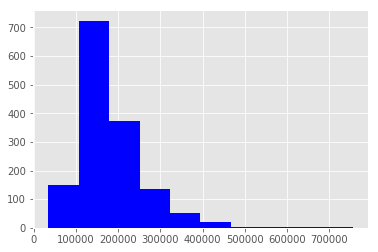

In [122]:
plt.hist(train.SalePrice, color='blue')
plt.savefig('rightscew.png')

In [123]:
train['log_SalePrice'] = np.log(train.SalePrice)
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,12.429216


In [124]:
numeric_cols = train.select_dtypes(np.number)
numeric_cols.shape
numeric_cols.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,log_SalePrice
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,208500,12.247694
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,181500,12.109011
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,223500,12.317167
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,140000,11.849398
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,250000,12.429216


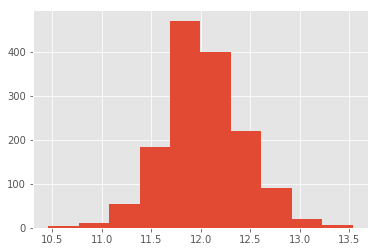

In [125]:
plt.hist(train.log_SalePrice)
plt.savefig('normalized.png')

In [126]:
numeric_cols.dtypes

Id                 int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
SalePrice          int64
log_SalePrice    float64
dtype: object

In [127]:
numeric_cols.corr(method='pearson')['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
log_SalePrice    0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [128]:
print(train.shape)
print(test.shape)

(1460, 82)
(1459, 80)


## OverallQual

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
0


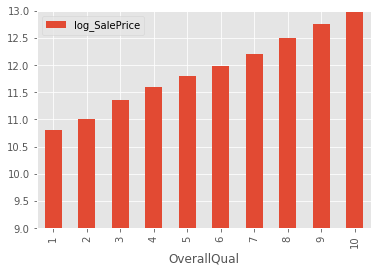

In [129]:
pivot = train.pivot_table(index='OverallQual', values = 'log_SalePrice', aggfunc=np.median)
pivot.plot(kind='bar',ylim=(9,13))
print(train.OverallQual.value_counts())
print(train.OverallQual.isnull().sum())

## GrLivArea

0


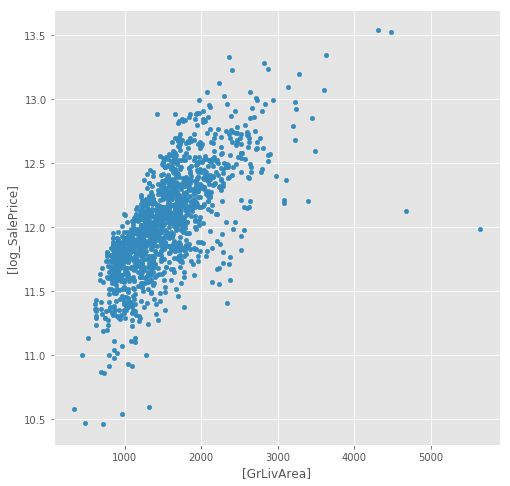

In [130]:
train.plot(x=['GrLivArea'], y=['log_SalePrice'], kind='scatter', figsize = (8,8))
print(train.GrLivArea.isnull().sum())

In [131]:
train['GrLivArea'].sort_values(ascending=False).head(5)

1298    5642
523     4676
1182    4476
691     4316
1169    3627
Name: GrLivArea, dtype: int64

In [132]:
#removing 2 outliers
train = train[train['GrLivArea'] < 4670]

In [133]:
print(train.shape)
print(test.shape)

(1458, 82)
(1459, 80)


## Garage Cars (changed to cat var.)

In [134]:
#pivot = train.pivot_table(index='GarageCars', values = 'log_SalePrice', aggfunc=np.median)
#pivot.plot(kind='bar',ylim=(11,13))

In [135]:
#print(train.shape)
#print(test.shape)

## GarageArea

In [136]:
test['GarageArea'] = test['GarageArea'].fillna(value=test.GarageArea.mean())

0


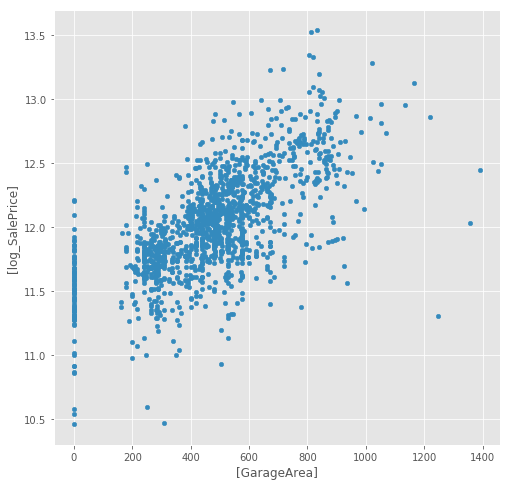

In [137]:
train.plot(x=['GarageArea'], y=['log_SalePrice'], kind='scatter', figsize = (8,8))
print(train.GarageArea.isnull().sum())

In [138]:
train['GarageArea'].sort_values(ascending=False).head(5)

581     1390
1190    1356
1061    1248
825     1220
178     1166
Name: GarageArea, dtype: int64

In [139]:
#removing 3 outliers
train = train[train['GarageArea'] < 1247]
train.shape

(1455, 82)

## TotalBsmtSF

In [140]:
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(value=test.TotalBsmtSF.mean())

0


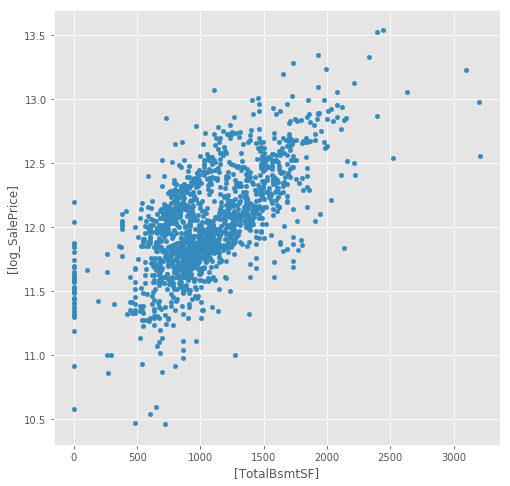

In [141]:
train.plot(x=['TotalBsmtSF'], y=['log_SalePrice'], kind='scatter', figsize = (8,8))
print(train.TotalBsmtSF.isnull().sum())

## 1stFlrSF

In [142]:
#dropping, 1stfl + 2ndfl = totalSF_log
#print(train.shape)
#print(test.shape)

In [143]:
#train.plot(x=['TotalBsmtSF'], y=['log_SalePrice'], kind='scatter', figsize = (5,5))
#print(train['1stFlrSF'].isnull().sum())

## TotalSF_log

In [144]:
train['TotalSF_log'] = np.log(train['1stFlrSF'] + train['2ndFlrSF'])
test['TotalSF_log'] = np.log(test['1stFlrSF'] + test['2ndFlrSF'])

0
0


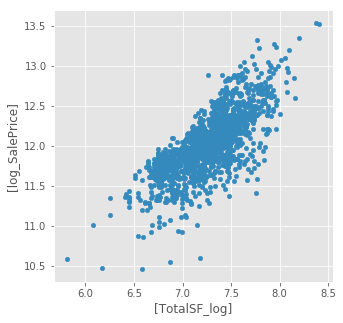

In [145]:
train.plot(x=['TotalSF_log'], y=['log_SalePrice'], kind='scatter', figsize = (5,5))
print(train['TotalSF_log'].isnull().sum())
print(test['TotalSF_log'].isnull().sum())

In [146]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [147]:
train = train.drop(columns=['1stFlrSF','2ndFlrSF'], axis=1)
test = test.drop(columns=['1stFlrSF','2ndFlrSF'], axis=1)

In [148]:
print(train.shape)
print(test.shape)

(1455, 81)
(1459, 79)


## FullBath

In [149]:
#train.pivot_table(index='FullBath', 
                         #values = 'log_SalePrice', 
                        # aggfunc = np.median).plot(kind='bar',ylim=(11,13))
#print(train.FullBath.value_counts())
#print(test.FullBath.value_counts())
#print(train.FullBath.isnull().sum())
#print(test.FullBath.isnull().sum())

## TotRmsAbvGrd

6     401
7     328
5     275
8     186
4      97
9      75
10     47
11     17
3      17
12     10
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64
6     442
7     320
5     308
8     160
4      99
9      68
10     33
11     14
3       8
12      5
15      1
13      1
Name: TotRmsAbvGrd, dtype: int64
0
0


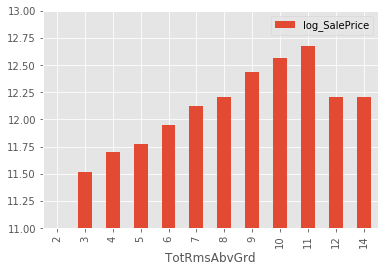

In [150]:
train.pivot_table(index='TotRmsAbvGrd', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,13), xlim=(0,16))
print(train.TotRmsAbvGrd.value_counts())
print(test.TotRmsAbvGrd.value_counts())
print(train.TotRmsAbvGrd.isnull().sum())
print(test.TotRmsAbvGrd.isnull().sum())

In [151]:
def f(x):
 return 12 if x >= 12 else x
train['TotRmsAbvGrd'] = train['TotRmsAbvGrd'].apply(f)
print(train.TotRmsAbvGrd.value_counts())   
print(train.shape)

6     401
7     328
5     275
8     186
4      97
9      75
10     47
11     17
3      17
12     11
2       1
Name: TotRmsAbvGrd, dtype: int64
(1455, 81)


In [152]:
def g(x):
 return 12 if x >= 12 else x
test['TotRmsAbvGrd'] = test['TotRmsAbvGrd'].apply(g)
print(test.TotRmsAbvGrd.value_counts())   
print(test.shape)

6     442
7     320
5     308
8     160
4      99
9      68
10     33
11     14
3       8
12      7
Name: TotRmsAbvGrd, dtype: int64
(1459, 79)


## YearBuilt

In [153]:
print(train.shape)
print(test.shape)
print(train.YearBuilt.value_counts())
print(test.YearBuilt.value_counts())
print(train.YearBuilt.isnull().sum())
print(test.YearBuilt.isnull().sum())

(1455, 81)
(1459, 79)
2006    67
2005    64
2004    54
2007    48
2003    45
1976    33
1977    32
1920    30
1959    26
1999    25
1998    25
1958    24
1965    24
1970    24
1954    24
2000    24
2002    23
1972    23
1968    22
1971    22
2008    21
1950    20
2001    20
1957    20
1962    19
1994    19
1966    18
2009    18
1995    18
1940    18
        ..
1986     5
1952     5
1880     4
1929     4
1932     4
1938     4
1983     4
1927     3
1919     3
1934     3
1989     3
1987     3
1912     3
1885     2
1892     2
1890     2
1942     2
1908     2
1882     1
1875     1
1893     1
2010     1
1898     1
1904     1
1905     1
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64
2005    78
2006    71
2007    60
2004    45
2003    43
1999    27
1920    27
2008    26
1910    26
1956    25
1967    25
1977    25
1958    24
2000    24
2002    24
1968    23
1978    23
1993    22
1998    21
1976    21
1997    21
1960    20
1961    20
1900    19


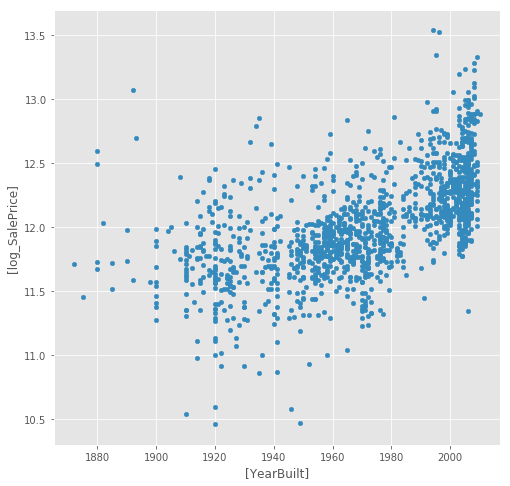

In [154]:
train.plot(x=['YearBuilt'], 
                  y=['log_SalePrice'], 
                  kind='scatter', 
                  figsize = (8,8))

## YearRemodAdd

In [155]:
print(train.shape)

(1455, 81)


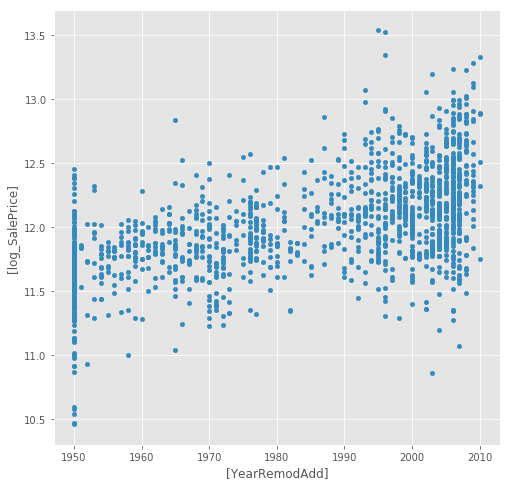

In [156]:
train.plot(x=['YearRemodAdd'], 
                  y=['log_SalePrice'], 
                  kind='scatter', 
                  figsize = (8,8))

In [157]:
print(train.YearRemodAdd.value_counts())
print(test.YearRemodAdd.value_counts())
print(train.YearRemodAdd.isnull().sum())
print(test.YearRemodAdd.isnull().sum())

1950    177
2006     97
2007     76
2005     73
2004     62
2000     55
2003     51
2002     48
2008     38
1996     36
1998     36
1995     31
1976     30
1999     30
1970     26
1997     25
1977     25
1994     22
2009     22
2001     21
1972     20
1965     19
1993     19
1971     18
1959     18
1968     17
1992     17
1978     16
1966     15
1958     15
       ... 
1962     14
1954     14
1969     14
1991     14
1963     13
1960     12
1967     12
1980     12
1973     11
1964     11
1989     11
1987     10
1956     10
1979     10
1953     10
1957      9
1988      9
1955      9
1985      9
1975      9
1961      8
1981      8
1974      7
1982      7
1984      7
2010      6
1983      5
1952      5
1986      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64
1950    183
2006    105
2007     88
2005     68
2004     49
2000     49
2003     48
2008     41
1998     41
2002     34
1994     31
1999     30
2001     28
1995     25
1993     24
1997     24
1996     23
1968     22
1967   

## MaxYrBltOrMod

## GarageYrBlt

In [158]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(value=train.GarageYrBlt.median())
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(value=train.GarageYrBlt.median())

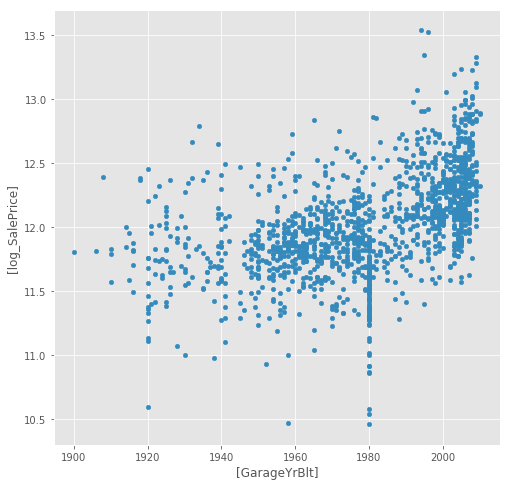

In [159]:
train.plot(x=['GarageYrBlt'], 
                  y=['log_SalePrice'], 
                  kind='scatter', 
                  figsize = (8,8))

In [160]:
## YearRemodAdd

In [161]:
print(train.shape)
print(test.shape)

(1455, 81)
(1459, 79)


## MasVnrArea

In [162]:
train['MasVnrArea'] = np.sqrt(train['MasVnrArea']).fillna(value=train.MasVnrArea.mean())
test['MasVnrArea'] = np.sqrt(test['MasVnrArea']).fillna(value=test.MasVnrArea.mean())

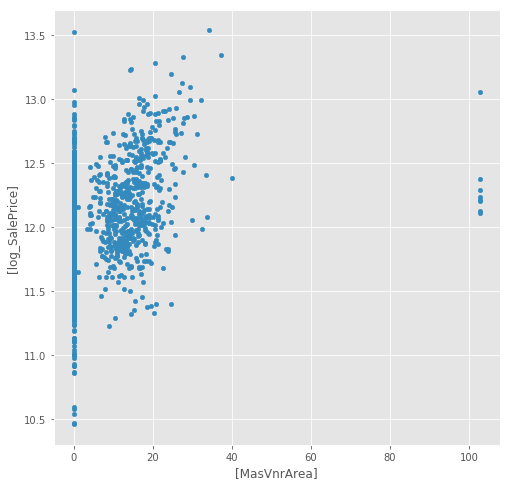

In [163]:
train.plot(x=['MasVnrArea'], y=['log_SalePrice'], kind='scatter', figsize = (8,8))

In [164]:
print(train.shape)
print(test.shape)

(1455, 81)
(1459, 79)


## Fireplaces

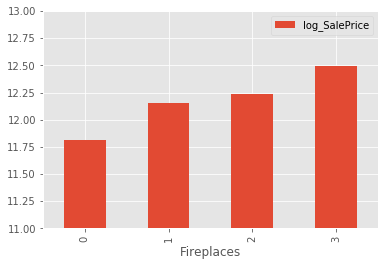

In [165]:
train.pivot_table(index='Fireplaces', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,13))

In [166]:
print(train.Fireplaces.value_counts())
print(test.Fireplaces.value_counts())
print(train.Fireplaces.isnull().sum())
print(test.Fireplaces.isnull().sum())

0    689
1    647
2    115
3      4
Name: Fireplaces, dtype: int64
0    730
1    618
2    104
3      6
4      1
Name: Fireplaces, dtype: int64
0
0


## BsmtFinSF1

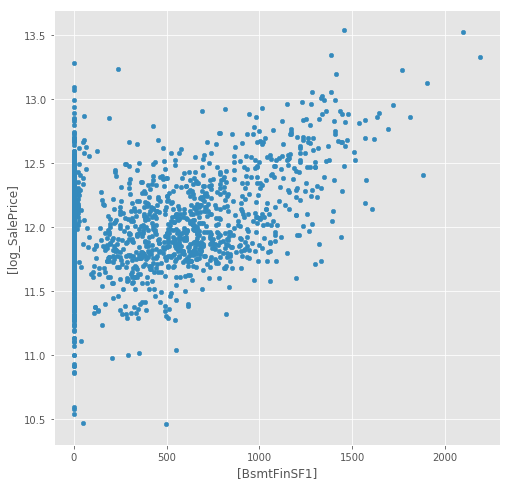

In [167]:
train.plot(x=['BsmtFinSF1'], y=['log_SalePrice'], 
                  kind='scatter', figsize = (8,8))

In [168]:
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(value=test.BsmtFinSF1.mean())

In [169]:
#print(train.BsmtFinSF1.value_counts())
#print(test.BsmtFinSF1.value_counts())
#print(train.BsmtFinSF1.isnull().sum())
print(test.BsmtFinSF1.isnull().sum())
print(test.shape)

0
(1459, 79)


## LotFrontage

In [170]:
train['LotFrontage'] = train['LotFrontage'].fillna(value=train.LotFrontage.mean())
train = train[train['LotFrontage'] < 200]
test['LotFrontage'] = test['LotFrontage'].fillna(value=test.LotFrontage.mean())

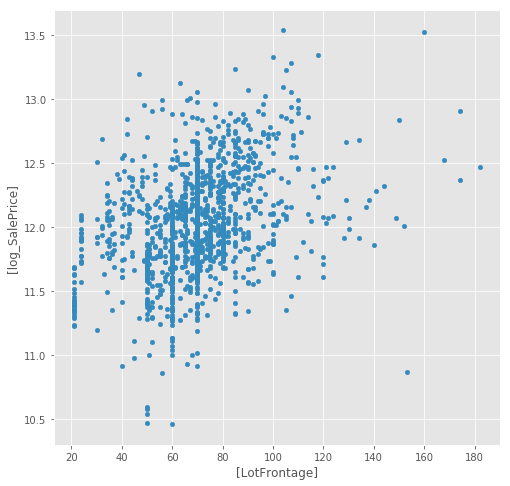

In [171]:
train.plot(x=['LotFrontage'], y=['log_SalePrice'], 
                  kind='scatter', figsize = (8,8))

In [172]:
print(train.BsmtFinSF1.value_counts())
print(test.BsmtFinSF1.value_counts())
print(train.BsmtFinSF1.isnull().sum())
print(test.BsmtFinSF1.isnull().sum())
print(test.shape)
print(train.shape)

0       465
24       12
16        9
20        5
936       5
686       5
662       5
616       5
560       4
428       4
442       4
495       4
504       4
547       4
641       4
588       4
600       4
384       4
655       4
697       4
1200      4
400       4
553       4
360       4
312       4
300       4
375       3
168       3
656       3
659       3
       ... 
696       1
1247      1
694       1
692       1
631       1
632       1
1880      1
639       1
1302      1
642       1
644       1
645       1
651       1
1285      1
1283      1
658       1
1282      1
1280      1
661       1
1277      1
668       1
673       1
1270      1
678       1
679       1
1261      1
684       1
1260      1
689       1
1904      1
Name: BsmtFinSF1, Length: 635, dtype: int64
0.0       462
24.0       15
276.0       6
602.0       6
300.0       5
758.0       5
16.0        5
288.0       5
330.0       4
624.0       4
476.0       4
864.0       4
544.0       4
600.0       4
468.0       4
384.0       4


## WoodDeckSF

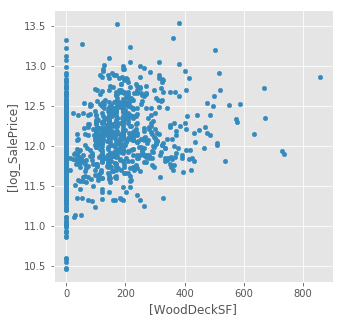

In [173]:
train.plot(x=['WoodDeckSF'], y=['log_SalePrice'], 
                  kind='scatter', figsize = (5,5))

In [174]:

print(train.WoodDeckSF.isnull().sum())
print(test.WoodDeckSF.isnull().sum())

0
0


In [175]:
train['WoodDeckSF'] = np.sqrt(train['WoodDeckSF'])
test['WoodDeckSF'] = np.sqrt(test['WoodDeckSF'])

## 2ndFlrSF

In [176]:
#dropped for total sf
#train.plot(x=['2ndFlrSF'], y=['log_SalePrice'], 
                  #kind='scatter', figsize = (5,5))

## OpenPorchSF

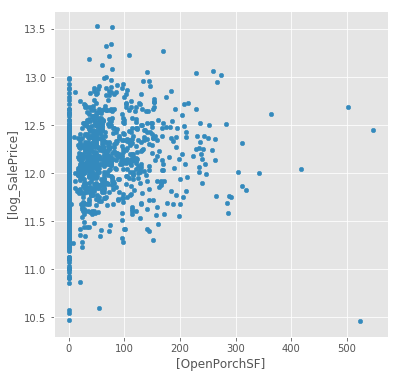

In [177]:
train.plot(x=['OpenPorchSF'], y=['log_SalePrice'], 
                  kind='scatter', figsize = (6,6))

In [178]:
print(train.OpenPorchSF.isnull().sum())
print(test.OpenPorchSF.isnull().sum())

0
0


In [179]:
train['OpenPorchSF'] = np.sqrt(train['OpenPorchSF'])
test['OpenPorchSF'] = np.sqrt(test['OpenPorchSF'])

In [180]:
#Removing 3 outlier
#train = train[train['OpenPorchSF'] < 500]

In [181]:
test.shape

(1459, 79)

## TotalBath

In [182]:
train['TotalBath'] = (.5*train['HalfBath'])+train['FullBath']
test['TotalBath'] = (.5*test['HalfBath'])+test['FullBath']

1.0    467
2.0    432
2.5    332
1.5    180
3.0     20
3.5     17
0.0      3
0.5      3
Name: TotalBath, dtype: int64
0
1.0    474
2.0    435
2.5    324
1.5    184
3.0     20
3.5     15
5.0      4
0.5      2
4.0      1
Name: TotalBath, dtype: int64
0


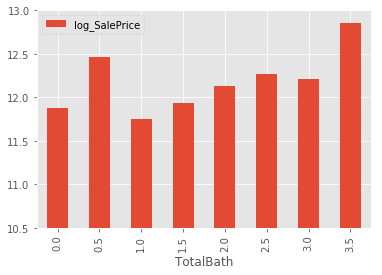

In [183]:
train.pivot_table(index='TotalBath', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(10.5,13))
print(train.TotalBath.value_counts())
print(train.TotalBath.isnull().sum())
print(test.TotalBath.value_counts())
print(test.TotalBath.isnull().sum())

In [184]:
train = train.drop(columns=['FullBath','HalfBath'])
test = test.drop(columns=['FullBath','HalfBath'])

In [185]:
print(train.shape)
print(test.shape)

(1454, 80)
(1459, 78)


## LotArea

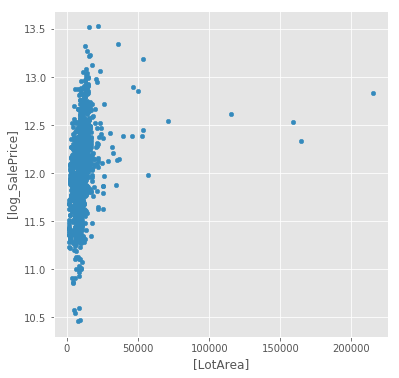

In [186]:
train.plot(x=['LotArea'], y=['log_SalePrice'], 
                  kind='scatter', figsize = (6,6))

In [187]:
train.LotArea=np.log(train.LotArea)
test.LotArea=np.log(test.LotArea)

In [188]:
#Removing 1 outliers
train = train[train['LotArea'] < 12.2]

In [189]:
test.shape

(1459, 78)

## BsmtTotalBath

In [190]:
train['BsmtTotalBath'] = (.5*train['BsmtHalfBath'])+train['BsmtFullBath']
test['BsmtTotalBath'] = (.5*test['BsmtHalfBath'])+test['BsmtFullBath']

In [191]:
test['BsmtTotalBath'].fillna(0, inplace=True)

0.0    781
1.0    578
0.5     71
2.0     13
1.5      9
3.0      1
Name: BsmtTotalBath, dtype: int64
0
0.0    769
1.0    574
0.5     81
2.0     24
1.5     10
3.0      1
Name: BsmtTotalBath, dtype: int64
0


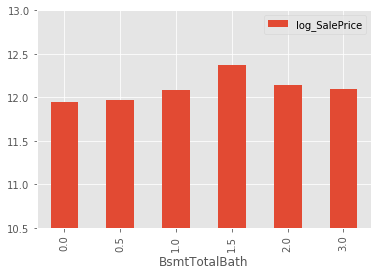

In [192]:
train.pivot_table(index='BsmtTotalBath', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(10.5,13))
print(train.BsmtTotalBath.value_counts())
print(train.BsmtTotalBath.isnull().sum())
print(test.BsmtTotalBath.value_counts())
print(test.BsmtTotalBath.isnull().sum())

In [193]:
train = train.drop(columns=['BsmtFullBath', 'BsmtHalfBath'], axis=1)
test = test.drop(columns=['BsmtFullBath', 'BsmtHalfBath'], axis=1)
print(train.shape)
print(test.shape)

(1453, 79)
(1459, 77)


## BsmtFullBath

In [194]:
#train.pivot_table(index='BsmtFullBath', 
                       #  values = 'log_SalePrice', 
                       #  aggfunc = np.median).plot(kind='bar',ylim=(10.5,13))

## BsmtHalfBath

In [195]:
#already dropped
print(train.shape)
print(test.shape)

(1453, 79)
(1459, 77)


## BsmtUnfSF

In [196]:
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(value=test.BsmtUnfSF.mean())

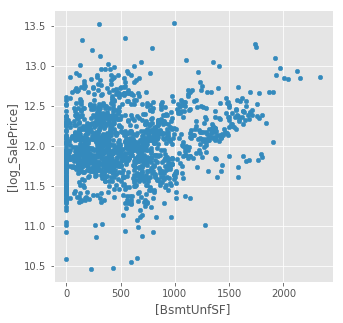

In [197]:
train.plot(x=['BsmtUnfSF'], y=['log_SalePrice'], 
                  kind='scatter', figsize = (5,5))

In [198]:
train['BsmtUnfSF'] = np.sqrt(train['BsmtUnfSF'])
test['BsmtUnfSF'] = np.sqrt(test['BsmtUnfSF'])

## BedroomAbvGr

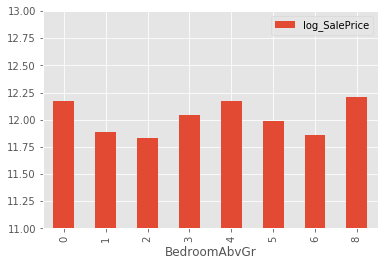

In [199]:
train.pivot_table(index='BedroomAbvGr', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,13))

In [200]:
print(train.BedroomAbvGr.value_counts())
print(train.BedroomAbvGr.isnull().sum())
print(test.BedroomAbvGr.value_counts())
print(test.BedroomAbvGr.isnull().sum())

3    799
2    357
4    212
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64
0
3    792
2    384
4    187
1     53
5     27
6     14
0      2
Name: BedroomAbvGr, dtype: int64
0


## ScreenPorch

In [201]:
train = train.drop('ScreenPorch', axis=1)
test = test.drop('ScreenPorch', axis=1)

## PoolArea

In [202]:
train = train.drop('PoolArea', axis=1)
test = test.drop('PoolArea', axis=1)

## 3SsnPorch

In [203]:
train = train.drop('3SsnPorch', axis=1)
test = test.drop('3SsnPorch', axis=1)

## BsmtFinSF2

In [204]:
train=train.drop('BsmtFinSF2',axis=1)
test=test.drop('BsmtFinSF2',axis=1)

## MiscVal

In [205]:
train = train.drop('MiscVal', axis=1)
test = test.drop('MiscVal', axis=1)

## LowQualFinSF

In [206]:
train=train.drop('LowQualFinSF',axis=1)
test=test.drop('LowQualFinSF',axis=1)

## YrSold

## OverallCond

In [207]:
##moved to categorical

In [208]:
#train.pivot_table(index='OverallCond', 
 #                        values = 'log_SalePrice', 
  #                       aggfunc = np.median).plot(kind='bar',ylim=(10,13))
#print(train.OverallCond.value_counts())
#print(train.OverallCond.isnull().sum())
#print(test.OverallCond.value_counts())
#print(test.OverallCond.isnull().sum())

## MSSubClass

In [209]:
train.shape

(1453, 73)

## EnclosedPorch

In [210]:
train=train.drop('EnclosedPorch', axis=1)
test=test.drop('EnclosedPorch', axis=1)

## KitchenAbvGr

In [211]:
train=train.drop('KitchenAbvGr', axis=1)
test=test.drop('KitchenAbvGr', axis=1)

## Null Values

In [212]:
null_vals = pd.DataFrame(test.isnull().sum().sort_values(ascending=False))
null_vals

,0
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
FireplaceQu,730
GarageFinish,78
GarageCond,78
GarageQual,78
GarageType,76
BsmtCond,45


In [213]:
print(train.shape)
print(test.shape)


(1453, 71)
(1459, 69)


In [214]:
%store train
%store test

Stored 'train' (DataFrame)
Stored 'test' (DataFrame)
